In [4]:
import pandas as pd
import numpy as np

In [8]:
# Load training data
train_data = pd.read_csv('/content/train.csv')
# Load testing data
test_data = pd.read_csv('/content/test.csv')

In [9]:
# Explore the data
print(train_data.describe())
print("\nMissing values in training data:", train_data.isnull().sum().sum())
print("Missing values in testing data:", test_data.isnull().sum().sum())

# Assuming the features start from the first column and the activity labels are in the last column
X_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1]
X_test = test_data.iloc[:, :-1]
y_test = test_data.iloc[:, -1]

# Normalize the feature data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Encode labels
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

       tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
count        7352.000000        7352.000000        7352.000000   
mean            0.274488          -0.017695          -0.109141   
std             0.070261           0.040811           0.056635   
min            -1.000000          -1.000000          -1.000000   
25%             0.262975          -0.024863          -0.120993   
50%             0.277193          -0.017219          -0.108676   
75%             0.288461          -0.010783          -0.097794   
max             1.000000           1.000000           1.000000   

       tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
count       7352.000000       7352.000000       7352.000000       7352.000000   
mean          -0.605438         -0.510938         -0.604754         -0.630512   
std            0.448734          0.502645          0.418687          0.424073   
min           -1.000000         -0.999873         -1.000000         -1.000000   


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input

# Build the model
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Define the input shape explicitly
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(np.unique(y_train)), activation='softmax')  # Output layer for multi-class classification
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [22]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001, verbose=1)

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test),
                    callbacks=[early_stop, reduce_lr], verbose=2)

Epoch 1/20
230/230 - 2s - 9ms/step - accuracy: 0.9890 - loss: 0.0287 - val_accuracy: 0.9528 - val_loss: 0.2388 - learning_rate: 0.0010
Epoch 2/20
230/230 - 2s - 9ms/step - accuracy: 0.9918 - loss: 0.0232 - val_accuracy: 0.9444 - val_loss: 0.2519 - learning_rate: 0.0010
Epoch 3/20
230/230 - 2s - 8ms/step - accuracy: 0.9922 - loss: 0.0230 - val_accuracy: 0.9589 - val_loss: 0.2244 - learning_rate: 0.0010
Epoch 4/20
230/230 - 1s - 5ms/step - accuracy: 0.9906 - loss: 0.0266 - val_accuracy: 0.9505 - val_loss: 0.2575 - learning_rate: 0.0010
Epoch 5/20

Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
230/230 - 1s - 3ms/step - accuracy: 0.9891 - loss: 0.0324 - val_accuracy: 0.9501 - val_loss: 0.2674 - learning_rate: 0.0010
Epoch 6/20
230/230 - 1s - 6ms/step - accuracy: 0.9933 - loss: 0.0189 - val_accuracy: 0.9555 - val_loss: 0.2452 - learning_rate: 2.0000e-04


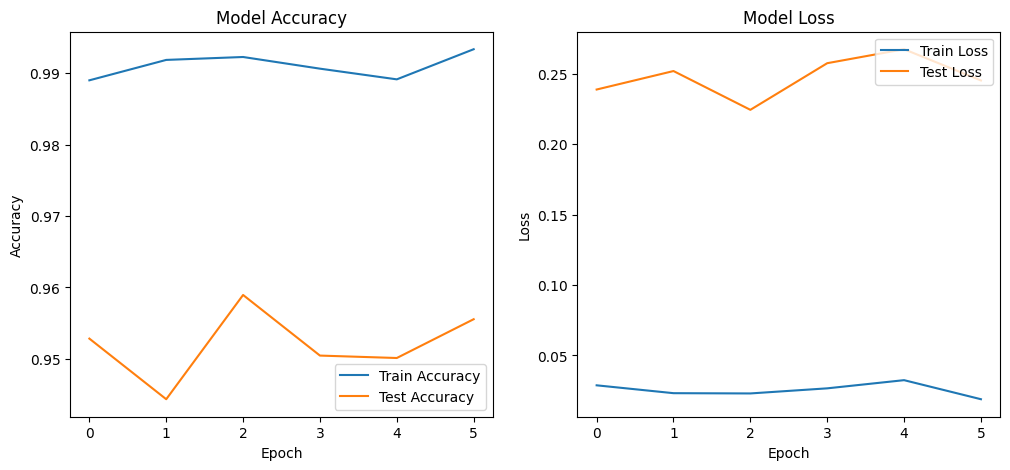

In [23]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()